# Part I Exploratory Data Analysis 

## Users who signed up for the product in the last two years

There are total of 12000 users sing up for the product from 2012 to 2014 in the give time period. There is a significant increase in 2013 and remarkable decrease in 2014. The correlation with such changes will be communicated. 

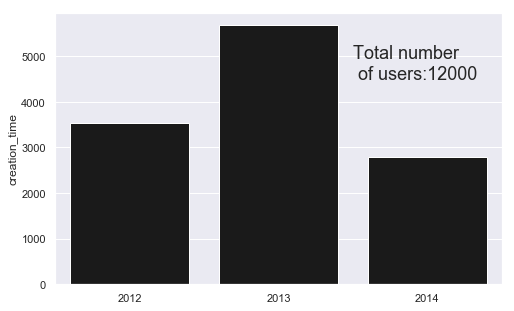

In [45]:
get_graph1()

In 2013, almos in ever category it doubles the previous years of number of users.<br> As it can be seen from the graph below, there is high number of users when they are invited to an organization (as a full member). <br>Other factor are have similar characteristics other then google email auth.sign ups. 

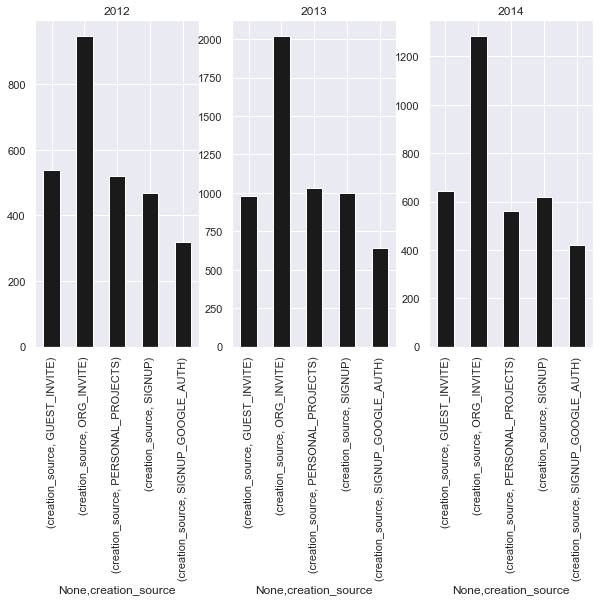

<Figure size 720x1440 with 0 Axes>

In [49]:
get_graph2()

According the pearson correlation there is one distinct correlation between when they have opted into receiving
marketing emails, they are on the regular marketing email drip. The pearson correlation the rate is 0.483529.

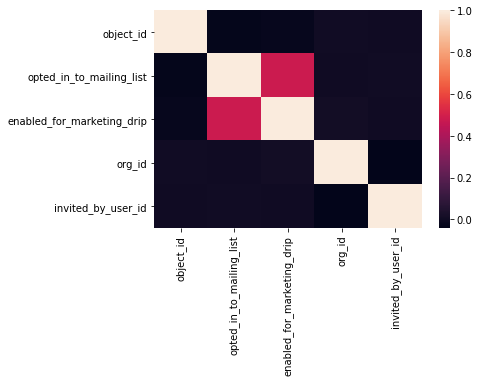

In [32]:
get_graph3()

---
<br>There are 3177 of 1200 signed up however they have never created a session. These users will be dropped to clean the data. This is about 27% of the data.<br><br>
Number of user invited to join by their friends is 6417 which is about 53% of the data. This shows that word of the mouth is very important. 

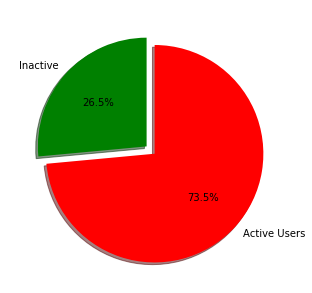

In [33]:
get_graph4()

# Part II Preparing Data For Modeling  

### Defining Adopted Users

As it is defined in the instructions, defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven days period , identify which factors predict future user adoption.

There are total 207917 logins, Number of logins in 7 consecutive days are gathered. After cleaning the duplicates and there are only 1602 unique members who visited more than 3 times in a week.

### Cleaning User Data and Merging

User data is also cleaned and there is only 1602 user information is kept for the modeling.<br>
<br>
<br><br>

# Part III Modeling  

### 1. Dealing with Categorical Variables 

Pandas get_dummies() will be used to encode categorical variables. Drop first arguments is used to reduce the amount of repetitions and redundancy 

# Part IV Modeling  Results  

## Logistic Regression

#### Before SMOTE 

best params is :  {'model__C': 0.0001, <br>'model__class_weight': 'balanced', 'model__penalty': 'l1'}<br>
best score is :  1.0<br>
#####################<<br>
Test data <br>
#####################<br>
F1:  0.9309333820196966<br>
Cohen Kappa:  0.6307752145049124<br>
Brier:  0.11283247947224366<br>
LogLoss:  0.5043987090514648<br>

#### After SMOTE<br>
best params is :  {'model__C': 0.0001, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}<br>
best score is :  1.0<br>
#####################<br>
Test data<br>
#####################<br>
F1:  1.0<br>
Cohen Kappa:  1.0<br>
Brier:  0.0<br>
LogLoss:  0.3991148583767009<br>
  

## Random Fores

#### Before SMOTE 
best params is :  {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, <br>'min_samples_split': 8, 'n_estimators': 100}<br>
best score is :  1.0<br>
#####################<br>
Test data<br>
#####################<br>
F1:  1.0<br>
Cohen Kappa:  1.0<br>
Brier:  0.0<br>


#### After SMOTE<br>
Not Needed, Random Forest handles the imbalanced data pretty well

### Importing Packages 

In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
%matplotlib inline

### Loading User Data

In [2]:
users = pd.read_csv('takehome_users.csv',encoding = 'latin-1')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


### Fixing binary data series if user is invited by friend or not.

In [4]:
users.invited_by_user_id = users.invited_by_user_id.fillna(0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Graphing for EDA

In [4]:
def get_graph1():
    years=users.creation_time.astype(str).str.slice(0,4)
    x = years.unique()
    y = years.groupby(years).count()
    plt.figure(figsize=[8,5])
    sns.set()
    sns.barplot(x,y,color='k')
    plt.text(x=1.5, y=4500, s= 'Total number \n of users:{}'.format(users.shape[0]),fontsize=18)


In [6]:
years=users.creation_time.astype(str).str.slice(0,4)
y = users.creation_source.groupby([users.creation_source,years]).count()
df =pd.DataFrame(y).unstack(level=0)
df

creation_source                                      \
creation_source    GUEST_INVITE ORG_INVITE PERSONAL_PROJECTS SIGNUP   
creation_time                                                         
2012                        540        948               519    470   
2013                        981       2021              1033    997   
2014                        642       1285               559    620   

                                    
creation_source SIGNUP_GOOGLE_AUTH  
creation_time                       
2012                           320  
2013                           644  
2014                           421

In [7]:
def get_graph2():
    f, a = plt.subplots(1,3)
    plt.figure(figsize=[10,20])
    df.xs('2012').plot(kind='bar',ax=a[0],figsize=(10,6), color='k',title=2012)
    df.xs('2013').plot(kind='bar',ax=a[1],figsize=(10,6),color='k',title=2013)
    df.xs('2014').plot(kind='bar',ax=a[2],figsize=(10,6),color='k',title=2014)
    plt.tight_layout()
    


In [8]:
users.corr(method ='pearson')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.001657
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.009387
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.007536
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003431
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.040868
invited_by_user_id,0.001657,0.009387,0.007536,0.003431,-0.040868,1.000000


In [9]:
def get_graph3():
    sns.heatmap(users.corr(), xticklabels=users.corr().columns, yticklabels=users.corr().columns)

In [10]:
users['last_session_creation_time']=users.last_session_creation_time[users.last_session_creation_time.notnull()].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [11]:
users.last_session_creation_time.unique()

array(['2014-04-21T22:53:30.000000000', '2014-03-30T22:45:04.000000000',
       '2013-03-19T18:14:52.000000000', ...,
       '2014-04-27T07:45:16.000000000', '2012-06-02T06:55:59.000000000',
       '2014-01-26T02:57:12.000000000'], dtype='datetime64[ns]')

In [12]:
users['creation_time']= pd.to_datetime(users.creation_time)
users['creation_time'][0]
users.last_session_creation_time[0]

Timestamp('2014-04-21 22:53:30')

In [13]:
users['inactivity']= (users.last_session_creation_time[users.last_session_creation_time.notnull()]-users.creation_time[users.creation_time.notnull()])

In [15]:
users = users.sort_values(by='inactivity')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 02:57:12,0,1,0,0.0,-1 days +18:00:00
2720,2721,2013-01-08 05:54:27,Kristiansen Victor,VictorCKristiansen@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-07 23:54:27,1,0,14,0.0,-1 days +18:00:00
5188,5189,2013-11-26 11:09:41,Thompson Mohammad,MohammadThompson@gustr.com,SIGNUP,2013-11-26 05:09:41,0,0,261,0.0,-1 days +18:00:00
5452,5453,2013-12-26 03:15:33,Hansen Brandon,BrandonSHansen@yahoo.com,SIGNUP,2013-12-25 21:15:33,1,0,22,0.0,-1 days +18:00:00
2637,2638,2014-01-11 04:36:33,Eriksen Rolla,RollaAEriksen@gustr.com,SIGNUP,2014-01-10 22:36:33,0,0,350,0.0,-1 days +18:00:00


In [16]:
def get_graph4():
    x=users.last_session_creation_time[users.last_session_creation_time.isnull()].shape[0]
    y=users.shape[0]-x
    plt.figure(figsize=[5,5])
    plt.pie([x/users.shape[0],y/users.shape[0]], explode=(0,0.1), autopct='%1.1f%%',colors='grays',
            shadow=True, startangle=90, labels= ('Inactive', 'Active Users'))


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 11999 to 11993
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
inactivity                    8823 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(3), timedelta64[ns](1)
memory usage: 1.1+ MB


### Loading User Engagement Data

In [5]:
user_en = pd.read_csv('takehome_user_engagement.csv')
user_en.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
user_en['time_stamp']=pd.to_datetime(user_en['time_stamp'])

### Defining Adopted Users

In [8]:
user_en['visits_7_days'] = user_en.groupby('user_id', as_index=False, group_keys=False).apply(lambda x:x.rolling('7D',on='time_stamp')['user_id'].count())
user_en.head(5)


,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [14]:
user_en.drop_duplicates('user_id', keep = 'first')
user_en.shape

(207917, 4)

In [15]:
user_en[user_en['visits_7_days']>3].count()

time_stamp       132768
user_id          132768
visited          132768
visits_7_days    132768
dtype: int64

In [13]:
user_en.shape

(207917, 4)

In [23]:
adopted_users = user_en[user_en['visits_7_days']>=3]

adopted_users = adopted_users.drop_duplicates('user_id', keep = 'first')

len(adopted_users)

1602

In [26]:
aadopted_users_list = adopted_users.user_id.tolist()

### Cleaning User Data

In [370]:
users=users[users.object_id.isin(aadopted_users_list)]
len(users)

1602

In [27]:
users.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 02:57:12,0,1,0,0.0,-1 days +18:00:00
2720,2721,2013-01-08 05:54:27,Kristiansen Victor,VictorCKristiansen@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-07 23:54:27,1,0,14,0.0,-1 days +18:00:00


In [28]:
user_en.drop(['visited'],axis=1, inplace=True)

In [29]:
user_en.head(2)

,time_stamp,user_id,visits_7_days
0,2014-04-22 03:53:30,1,1.0
1,2013-11-15 03:45:04,2,1.0


In [50]:
users.shape

(12000, 11)

### Merging User Data and Engagement Data

In [84]:
users_f = users.merge(user_en, how = 'left', left_on = 'object_id', right_on = 'user_id')

In [85]:
users_f['last_session_creation_time'] = users_f.last_session_creation_time[users_f['last_session_creation_time'].notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['time_stamp'] = users_f.time_stamp[users_f.time_stamp.notnull()].apply(lambda x: datetime.datetime.timestamp(x))
users_f['creation_time'] = users_f.creation_time[users_f.creation_time.notnull()].apply(lambda x: datetime.datetime.timestamp(x))

In [86]:
 users_f = users_f.fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [87]:
users_f.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,inactivity,time_stamp,user_id,visits_7_days
0,12000,1.390748e+09,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,0.0,-1 days +18:00:00,1.390748e+09,12000.0,1.0
1,2721,1.357646e+09,Kristiansen Victor,VictorCKristiansen@gmail.com,SIGNUP_GOOGLE_AUTH,1.357624e+09,1,0,14,0.0,-1 days +18:00:00,1.357646e+09,2721.0,1.0
2,5189,1.385486e+09,Thompson Mohammad,MohammadThompson@gustr.com,SIGNUP,1.385464e+09,0,0,261,0.0,-1 days +18:00:00,1.385486e+09,5189.0,1.0
3,5453,1.388049e+09,Hansen Brandon,BrandonSHansen@yahoo.com,SIGNUP,1.388028e+09,1,0,22,0.0,-1 days +18:00:00,1.388049e+09,5453.0,1.0
4,2638,1.389437e+09,Eriksen Rolla,RollaAEriksen@gustr.com,SIGNUP,1.389415e+09,0,0,350,0.0,-1 days +18:00:00,1.389437e+09,2638.0,1.0


In [88]:
users_f.drop(['name','email','inactivity'],axis=1, inplace=True)
users_f.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days
0,12000,1.390748e+09,SIGNUP,1.390727e+09,0,1,0,0.0,1.390748e+09,12000.0,1.0
1,2721,1.357646e+09,SIGNUP_GOOGLE_AUTH,1.357624e+09,1,0,14,0.0,1.357646e+09,2721.0,1.0
2,5189,1.385486e+09,SIGNUP,1.385464e+09,0,0,261,0.0,1.385486e+09,5189.0,1.0
3,5453,1.388049e+09,SIGNUP,1.388028e+09,1,0,22,0.0,1.388049e+09,5453.0,1.0
4,2638,1.389437e+09,SIGNUP,1.389415e+09,0,0,350,0.0,1.389437e+09,2638.0,1.0


In [89]:
users_f['is_adopted']=users_f.visits_7_days
users_f['is_adopted'][users_f['is_adopted']>=3].count()

160522

In [90]:
users_f['is_adopted'][users_f['is_adopted']<3]=0
users_f['is_adopted'][users_f['is_adopted']>=3]=1
users_f['is_adopted'][users_f['is_adopted']==1].count()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


160522

### 1. Pandas get_dummies( ) Dealing with Categorical Variables 

Pandas get_dummies() will be used to encode categorical variables. Drop first arguments is used to reduce the amount of repetitions and redundancy 

In [91]:
dummy_user_f= pd.get_dummies(users_f,drop_first=True,dummy_na=True)
dummy_user_f.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days,is_adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_source_nan
0,12000,1.390748e+09,1.390727e+09,0,1,0,0.0,1.390748e+09,12000.0,1.0,0.0,0,0,1,0,0
1,2721,1.357646e+09,1.357624e+09,1,0,14,0.0,1.357646e+09,2721.0,1.0,0.0,0,0,0,1,0
2,5189,1.385486e+09,1.385464e+09,0,0,261,0.0,1.385486e+09,5189.0,1.0,0.0,0,0,1,0,0
3,5453,1.388049e+09,1.388028e+09,1,0,22,0.0,1.388049e+09,5453.0,1.0,0.0,0,0,1,0,0
4,2638,1.389437e+09,1.389415e+09,0,0,350,0.0,1.389437e+09,2638.0,1.0,0.0,0,0,1,0,0


In [99]:
dummy_user_f['Is_Adopted']=dummy_user_f.is_adopted
dummy_user_f.drop(['is_adopted'],axis=1,inplace=True)

In [92]:
dummy_user_f.shape

(211094, 16)

In [93]:
dummy_user_f.to_csv('dummy_user_f.csv')

In [94]:
dummy_user_f.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visits_7_days,is_adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_source_nan
0,12000,1.390748e+09,1.390727e+09,0,1,0,0.0,1.390748e+09,12000.0,1.0,0.0,0,0,1,0,0
1,2721,1.357646e+09,1.357624e+09,1,0,14,0.0,1.357646e+09,2721.0,1.0,0.0,0,0,0,1,0
2,5189,1.385486e+09,1.385464e+09,0,0,261,0.0,1.385486e+09,5189.0,1.0,0.0,0,0,1,0,0
3,5453,1.388049e+09,1.388028e+09,1,0,22,0.0,1.388049e+09,5453.0,1.0,0.0,0,0,1,0,0
4,2638,1.389437e+09,1.389415e+09,0,0,350,0.0,1.389437e+09,2638.0,1.0,0.0,0,0,1,0,0


In [95]:
dummy_user_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211094 entries, 0 to 211093
Data columns (total 16 columns):
object_id                             211094 non-null int64
creation_time                         211094 non-null float64
last_session_creation_time            211094 non-null float64
opted_in_to_mailing_list              211094 non-null int64
enabled_for_marketing_drip            211094 non-null int64
org_id                                211094 non-null int64
invited_by_user_id                    211094 non-null float64
time_stamp                            211094 non-null float64
user_id                               211094 non-null float64
visits_7_days                         211094 non-null float64
is_adopted                            211094 non-null float64
creation_source_ORG_INVITE            211094 non-null uint8
creation_source_PERSONAL_PROJECTS     211094 non-null uint8
creation_source_SIGNUP                211094 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH 

### Importing Modeling Packages

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

### Assigning Values and Target Variables


In [100]:
X = dummy_user_f.drop(['Is_Adopted'],axis=1)
y = dummy_user_f.Is_Adopted

### Size Reduction to 10% of the Data

In [101]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X,y,test_size=0.1, random_state=30, stratify=y)


### SMOTE


In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


In [103]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=30, stratify=y_sm)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

### Logistic Regression


In [104]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipeline = pl(steps)

# Parameters
param_grid = dict(model__C = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                  model__penalty = ['l1', 'l2'],
                  model__class_weight = ['balanced'])

# Setting up the grid search
LRcw = GridSearchCV(pipeline, param_grid = param_grid, 
                           verbose = 3,
                           cv = 5,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRcw.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.36 s, sys: 662 ms, total: 2.02 s
Wall time: 1min 34s


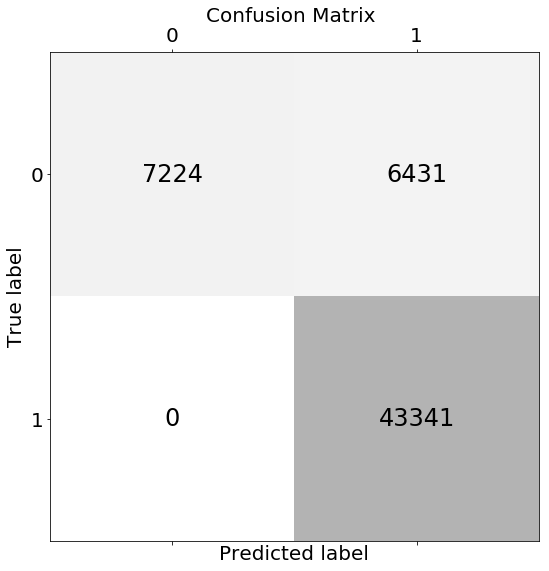

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

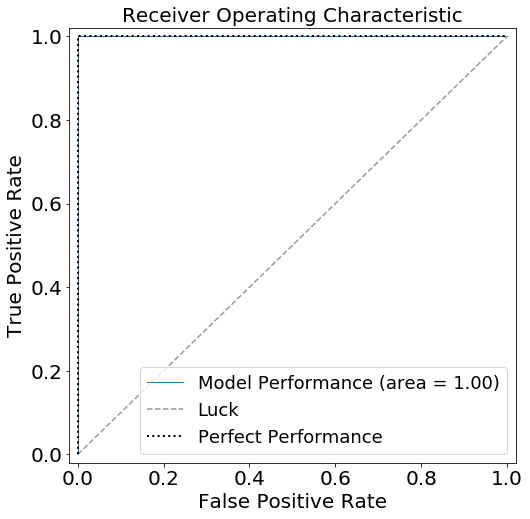

In [107]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
            [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)

## LR with SMOTE 

In [109]:
%%time
#SMOTE Split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=30, stratify=y_sm)


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipeline = pl(steps)

# Parameters
param_grid = dict(model__C = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                  model__penalty = ['l1', 'l2'],
                  model__class_weight = ['balanced'])

# Setting up the grid search
LRcw = GridSearchCV(pipeline, param_grid = param_grid, 
                           verbose = 3,
                           cv = 5,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
LRcw.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.12 s, sys: 245 ms, total: 1.37 s
Wall time: 1min 34s


In [110]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
print("best params is : ",LRcw.best_params_)
print("best score is : ", LRcw.best_score_)
y_pred_test = LRcw.predict(X_test)
y_pred_test_prob = LRcw.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

best params is :  {'model__C': 0.0001, 'model__class_weight': 'balanced', 'model__penalty': 'l1'}
best score is :  1.0
#####################
Test data
#####################
F1:  1.0
Cohen Kappa:  1.0
Brier:  0.0
LogLoss:  0.3991148583767009
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43341
         1.0       1.00      1.00      1.00     43341

   micro avg       1.00      1.00      1.00     86682
   macro avg       1.00      1.00      1.00     86682
weighted avg       1.00      1.00      1.00     86682



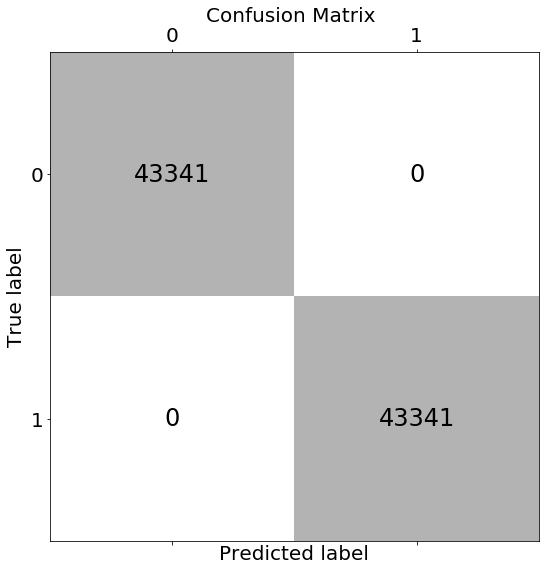

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()

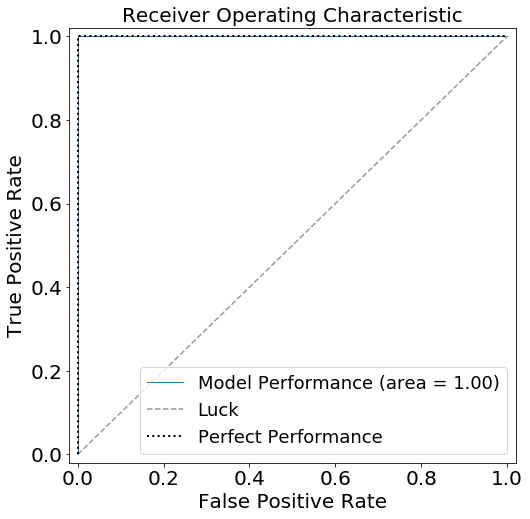

In [112]:
# ROC curve
fig1, ax1 = plt.subplots(figsize=(8, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], 
            [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
        
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate', size=20)
plt.ylabel('True Positive Rate', size=20)
plt.title('Receiver Operating Characteristic', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc="lower right", fontsize=18)

## Random Forest 

### Before SMOTE

In [113]:
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=30, stratify=y_sm)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)

In [117]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as pl
from imblearn.under_sampling import RandomUnderSampler
# Steps for pipeline
steps = [("rus", RandomUnderSampler(random_state=30)),
         ("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [50],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [5, 10, 15]
                  #model__class_weight = ['balanced', {0:0.05, 1:0.95}, {0:0.1, 1:0.9}]
                  )
# For CV in grid search
cv = 2
# Setting up the grid search
RFrus = GridSearchCV(pipe, param_grid = param_grid, 
                           verbose = 3,
                           cv = cv,
                          n_jobs=-1,
                          scoring='average_precision',
                          iid=False)
# Training using CV
RFrus.fit(X_train, y_train)

print("best params is : ",grid_search.best_params_)
print("best score is : ", grid_search.best_score_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    8.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.2s finished


best params is :  {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
best score is :  1.0
CPU times: user 1.65 s, sys: 141 ms, total: 1.79 s
Wall time: 9.83 s


In [118]:
y_pred_test = RFrus.predict(X_test)
y_pred_test_prob = RFrus.predict_proba(X_test)

In [119]:
y_pred_test = RFrus.predict(X_test)
#y_pred_test_prob = grid_search.predict_proba(X_test)
print("#####################")
print("Test data")
print("#####################")
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
#print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
print(metrics.classification_report(y_test, y_pred_test))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)

#####################
Test data
#####################
F1:  1.0
Cohen Kappa:  1.0
Brier:  0.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13655
         1.0       1.00      1.00      1.00     43341

   micro avg       1.00      1.00      1.00     56996
   macro avg       1.00      1.00      1.00     56996
weighted avg       1.00      1.00      1.00     56996



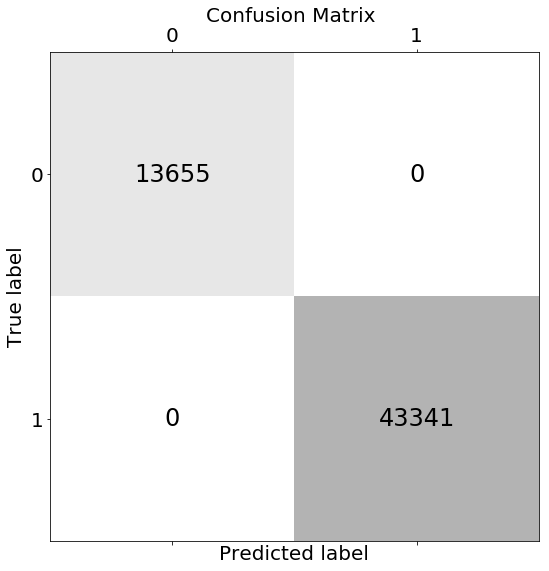

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
plt.title('Confusion Matrix ', size=20)
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
ax.tick_params('x', labelsize = 20)
ax.tick_params('y', labelsize = 20)
plt.tight_layout()